In [88]:
import requests
from bs4 import BeautifulSoup
import jieba.posseg as pseg
import jieba
from jieba.analyse import textrank
from textrank4zh import TextRank4Keyword, TextRank4Sentence
from wordcloud import WordCloud
import re

### 爬取新闻内容

In [11]:
# 网址
url = 'https://3w.huanqiu.com/a/c36dc8/41k9WpePp46'
# 获取内容
html = requests.get(url, timeout=10)
content = html.content
print(content)

b'<!DOCTYPE html>\n<html lang="zh">\n<head>\n    <meta charset="UTF-8">\n    <title>\xe8\x8e\xab\xe8\xbf\xaa\xe8\x87\xaa\xe5\xa4\xb8\xe5\x8d\xb0\xe5\xba\xa6\xe7\x96\xab\xe8\x8b\x97\xe6\x8e\xa5\xe7\xa7\x8d\xe9\x80\x9f\xe5\xba\xa6\xe5\x85\xa8\xe4\xb8\x96\xe7\x95\x8c\xe6\x9c\x80\xe5\xbf\xab\xef\xbc\x8c\xe7\xbd\x91\xe5\x8f\x8b\xe4\xb8\x80\xe7\xae\x97\xef\xbc\x9a\xe5\x85\xa8\xe6\x8e\xa5\xe7\xa7\x8d\xe5\xae\x8c\xe9\x9c\x80\xe8\xa6\x81\xe5\x8d\x81\xe5\x87\xa0\xe5\xb9\xb4\xe2\x80\xa6</title>\n    <meta name="keywords" content="\xe6\x8e\xa5\xe7\xa7\x8d,\xe5\x8d\xb0\xe5\xba\xa6,\xe7\x96\xab\xe8\x8b\x97,\xe8\x8e\xab\xe8\xbf\xaa,\xe6\x96\xb0\xe5\x86\xa0,\xe9\x80\x9f\xe5\xba\xa6,\xe6\x9c\x80\xe5\xbf\xab,15">\n    <meta name="description" content="\xe3\x80\x90\xe7\x8e\xaf\xe7\x90\x83\xe7\xbd\x91\xe6\x8a\xa5\xe9\x81\x93 \xe8\xae\xb0\xe8\x80\x85 \xe8\xbe\xb9\xe5\xad\x90\xe8\xb1\xaa\xe3\x80\x91\xe6\x8d\xae\xe3\x80\x8a\xe5\x8d\xb0\xe5\xba\xa6\xe6\x97\xb6\xe6\x8a\xa5\xe3\x80\x8b\xe6\xb6\x88\xe6\x81\xaf\x

In [12]:
# 创建BeautifulSoup对象
soup = BeautifulSoup(content, 'html.parser', from_encoding='utf-8')
text = soup.get_text()
print(text)





莫迪自夸印度疫苗接种速度全世界最快，网友一算：全接种完需要十几年…









 
        // 全局变量配置
        window.global = {
            id: '41k9WpePp46',
            type: 1,  // 文章类型
            category: '国际新闻', // 频道
            searchKey: ' 安倍辞职',// 搜索关键字
            keywords: '接种,印度,疫苗,莫迪,新冠,速度,最快,15',
            isPure: 0, // 领导人模板; 0否 1是
            source: '环球网', // 来源
            mpStatus : 0,// mp文章标识; 0否 1是
            aPage: true // aPage(article)详情页, mediaPage(ta)媒体页, tagPage(tag)标签页
        }
    

        .content-ad{
            margin: 7px 20px 0 0;
            padding: 20px 18px;
            border: 1px solid #ebebeb;
            float: left;
        }
        .content-ad iframe {
                margin: 0!important;
                padding: 0!important;
                min-height: 250px!important;
            }
        .hdTop {background: #90080E!important;}
        .hdTop .hdtLogin .hdtLogBoxWrap a { color:#fff!important;}
        .hdTop .hdtName { background: #90080E!important; }
        .navT

In [20]:
words = pseg.lcut(text)
person = {word for word, flag in words if flag=='nr'}
place = {word for word, flag in words if flag=='ns'}

In [21]:
print(f'新闻中人物包括：{person}')
print(f'新闻中地点包括：{place}')

新闻中人物包括：{'安倍', '莫迪', '魏少璞', '边子豪'}
新闻中地点包括：{'印度', '美国', '北京', '英国', '巴西'}


### 对非中文内容进行清洗

In [70]:
# 提取中文及相关标点符号
new_text = re.sub('[^[\u4e00-\u9fa5，。、；：‘“”’！？【】《》]{6,}', '', text)
print(new_text)





莫迪自夸印度疫苗接种速度全世界最快，网友一算：全接种完需要十几年全局变量配置文章类型国际新闻频道安倍辞职',// 搜索关键字接种,印度,疫苗,莫迪,新冠,速度,最快领导人模板; 0否 1是环球网来源文章标识; 0否 1是详情页媒体页标签页[[[自定义变量3', '国际新闻[自定义变量4', '魏少璞[[[[[莫迪自夸印度疫苗接种速度全世界最快，网友一算：全接种完需要十几年[接种,印度,疫苗,莫迪,新冠,速度,最快[环球网[国际新闻[国际新闻:独家[魏少璞[[[莫迪自夸印度疫苗接种速度全世界最快，网友一算：全接种完需要十几年边子豪

环球网



【环球网报道 记者 边子豪】据《印度时报》消息，印度总理莫迪当地时间31日称，印度不仅正在开展“全世界（规模）最大”的新冠疫苗接种行动，其疫苗接种速度也是“全世界最快”。不过，针对“最快”的说法，有网友算了笔账，发现按印度目前的接种速度，全体印度人完成接种大概需要十几年……“正如印度抗击新冠肺炎疫情为全世界树立了榜样，我们的疫苗接种计划也正成为世界的榜样。印度正在开展全世界（规模）最大的疫苗接种行动。”莫迪在一档广播节目中这样说，“你知道什么是更值得骄傲的吗？我们不仅正开展全世界（规模）最大的疫苗接种行动，我们给民众接种疫苗（的速度）也是世界最快。”莫迪继续说，印度仅在15天内就给300万抗疫工作者完成了接种，而更加富裕的美国和英国则分别用了18天和36天才完成同样的目标。随后，莫迪还吹嘘印度对世界抗疫做出的贡献。“这些天，我代表印度收到了来自不同国家的总统和总理发来的消息。你们一定也看到了最近巴西总统是如何发推感谢印度的——每个印度人都为此自豪。你们也一定注意到了疫苗接种计划，印度之所以能够帮助别人，是因为我们在医药和疫苗领域实现了独立自主。”不过，针对莫迪口中的印度接种速度最快的说法，有网友算起了账，发现照目前的速度，所有印度人接种完需要十几年。“按照每天接种二十万人的速度，我们将用大概14年接种完整个国家。（印度）政府拿每百万人的感染数作比较，但事关疫苗接种的话（应该比）绝对数字。速度可真快啊！”紧接着，有网友作出“更正”：↓“抱歉，大概是16.98年。”而另一名网友算出来的时间就更久了：18年↓“疫苗接种最快。15天300万人，相当于50天1000万，5000天10亿，6500天13亿，也就是18年。真棒！”

In [71]:
# 只保留正文内容
pattern = re.compile('】(.*?)责编', flags=re.S)
new_text = pattern.findall(new_text)[0]
print(new_text)

据《印度时报》消息，印度总理莫迪当地时间31日称，印度不仅正在开展“全世界（规模）最大”的新冠疫苗接种行动，其疫苗接种速度也是“全世界最快”。不过，针对“最快”的说法，有网友算了笔账，发现按印度目前的接种速度，全体印度人完成接种大概需要十几年……“正如印度抗击新冠肺炎疫情为全世界树立了榜样，我们的疫苗接种计划也正成为世界的榜样。印度正在开展全世界（规模）最大的疫苗接种行动。”莫迪在一档广播节目中这样说，“你知道什么是更值得骄傲的吗？我们不仅正开展全世界（规模）最大的疫苗接种行动，我们给民众接种疫苗（的速度）也是世界最快。”莫迪继续说，印度仅在15天内就给300万抗疫工作者完成了接种，而更加富裕的美国和英国则分别用了18天和36天才完成同样的目标。随后，莫迪还吹嘘印度对世界抗疫做出的贡献。“这些天，我代表印度收到了来自不同国家的总统和总理发来的消息。你们一定也看到了最近巴西总统是如何发推感谢印度的——每个印度人都为此自豪。你们也一定注意到了疫苗接种计划，印度之所以能够帮助别人，是因为我们在医药和疫苗领域实现了独立自主。”不过，针对莫迪口中的印度接种速度最快的说法，有网友算起了账，发现照目前的速度，所有印度人接种完需要十几年。“按照每天接种二十万人的速度，我们将用大概14年接种完整个国家。（印度）政府拿每百万人的感染数作比较，但事关疫苗接种的话（应该比）绝对数字。速度可真快啊！”紧接着，有网友作出“更正”：↓“抱歉，大概是16.98年。”而另一名网友算出来的时间就更久了：18年↓“疫苗接种最快。15天300万人，相当于50天1000万，5000天10亿，6500天13亿，也就是18年。真棒！”印度1月16日在全国范围内启动新冠疫苗接种工作。而印度目前依旧是新冠确诊病例排名第二的国家,仅次于美国。美国约翰斯·霍普金斯大学统计数据显示，截至北京时间1月31日下午7时22分，印度新冠确诊病例已超过1070万，死亡病例超过15万。




### 提取关键词

In [79]:
# 调用jieba库的接口
print('新闻的15个关键词分别为：', textrank(new_text, topK=15))

新闻的15个关键词分别为： ['印度', '接种', '疫苗', '新冠', '速度', '网友', '全世界', '总统', '国家', '完成', '世界', '病例', '时间', '行动', '抗疫']


In [83]:
# 调用textrank4zh
tr4w = TextRank4Keyword()
tr4w.analyze(text=new_text, lower=True, window=2)
print('关键词：')
for item in tr4w.get_keywords(20, word_min_len=1):
    print(item.word, item.weight)

关键词：
印度 0.07078971850137725
接种 0.04029252122556477
疫苗 0.032207501729663454
网友 0.0272678425117938
速度 0.023606318816942945
新冠 0.022143543440082177
病例 0.020670580938676443
全世界 0.018859354415083233
世界 0.018041396176031572
总统 0.017670729485626886
总理 0.015410425232375567
完成 0.015074782179183541
发现 0.014698199233818241
确诊 0.013748005924613515
人 0.013503047376044647
目前 0.013422426991687188
说 0.012736145181402004
抗疫 0.012444674082527234
统计数据 0.012101858208427123
范围 0.011375179934601656


### 获取新闻摘要

In [87]:
# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=new_text, lower=True, source = 'all_filters')
print('摘要：')
# 重要性较高的三个句子
for i, item in enumerate(tr4s.get_key_sentences(num=3), start=1):
    # index是语句在文本中位置，weight表示权重
#     print(item.index, item.weight, item.sentence)
    print(i, item.sentence)

摘要：
1 据《印度时报》消息，印度总理莫迪当地时间31日称，印度不仅正在开展“全世界（规模）最大”的新冠疫苗接种行动，其疫苗接种速度也是“全世界最快”
2 ”不过，针对莫迪口中的印度接种速度最快的说法，有网友算起了账，发现照目前的速度，所有印度人接种完需要十几年
3 不过，针对“最快”的说法，有网友算了笔账，发现按印度目前的接种速度，全体印度人完成接种大概需要十几年


### 词云可视化

In [98]:
# 去掉停用词
def remove_stop_words(s):
    stop_words = ['↓', '\n', '我们', '不过', '目前', '大概', '消息']
    for stop_word in stop_words:
        s = s.replace(stop_word, '')
    return s

In [99]:
def create_word_cloud(f):
    f = remove_stop_words(f)
    seg_list = jieba.lcut(f)
    cut_text = ' '.join(seg_list)
    wc = WordCloud(max_words=30, width=2000, height=1200, font_path='./msyh.ttf')
    wordcloud = wc.generate(cut_text)
    wordcloud.to_file('wordcloud.jpg')

In [102]:
create_word_cloud(new_text)

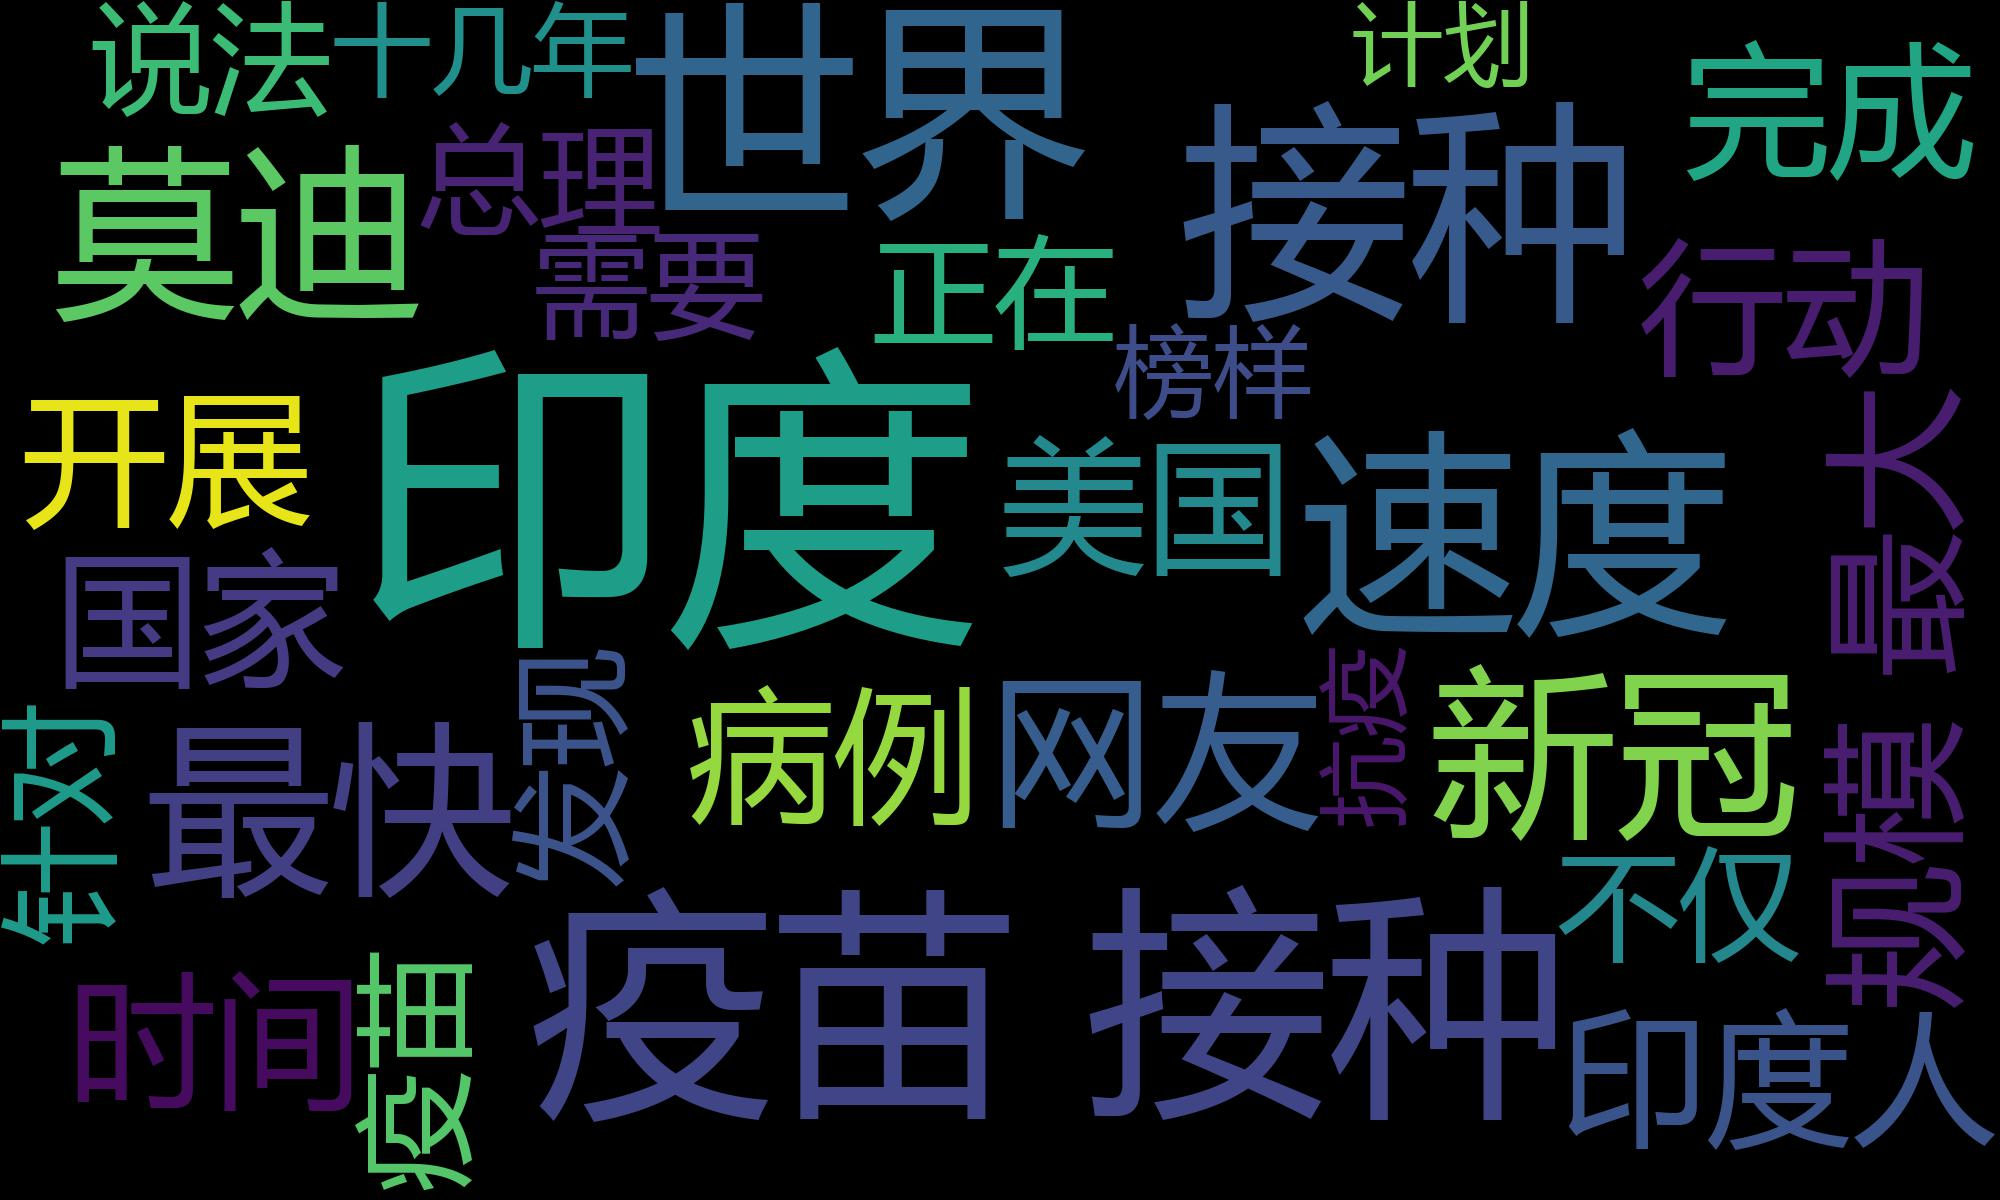

In [104]:
from IPython.display import Image
Image(filename = './wordcloud.jpg', width=1000, height=600)